### **Punto 2.Análisis Exploratorio de Datos (1.0 puntos).** 
Dado los siguientes conjuntos de datos: **Wind Speed** y **Fraud Detection**, realizar un análisis exploratorio de datos el cual incluya lo siguiente:

- Descripción de tipos de variables, reducción de nombres extensos en columnas, calcular número de observaciones, media, desviación estándar, mínimo, máximo, cuartiles, realizar conteo de
datos faltantes y su porcentaje, histograma o diagrama de barras para la variable respuesta e independientes según corresponda, seleccionar un mínimo de 4 variables independientes. Análisis
de simetría, datos atípicos y dispersión, etc,... por medio de **boxplot()**. Análisis bivariado. Trazado de **scatterplot()** y **regplot()** para un mínimo de 4 pares de variables explicativas. En cada
figura agregar un análisis y descripción. Para el conjunto de datos de detección de fraude hacer
un merge entre tablas basado en TransactionID. Para esto, debe usar la función **merge()**. Esto
es: **pd.merge(train_transaction, train_identity, on=’TransactionID’, how=’left’)**. Haga lo mismo
para el conjunto de prueba, el cual debe usar para evaluar el modelo final.

- Según corresponda, realizar imputación de datos faltantes con la mediana (ver **impute()**).Realizar
reducción de dimensionalidad por medio de eliminiación de columnas altamente correlacionadas
usando Variance Inflation Factor (*VIF*). Para esto se recomienda usar la siguiente librería **variance_inflation_factor()**. Un *VIF ≥ 5* indica alta multicolinealidad entre la correspondiente variable
independiente y las demás variables. Recomendación: Eliminar una columna a la vez. Aquella con
el máximo *VIF ≥ 5*. Luego, para el nuevo pandas, calcular nuevamente VIF e identificar nuevas
columnas con *VIF ≥ 5* máximo, y así sucesivamente hasta obtener solo valores de *VIF < 5*. Según
corresponda, variables categóricas deben previamente codificarse usando por ejemplo **OneHotEncoder()**. Pueden mantener las variables categóricas antes de la codificación previa al entrenamiento
del modelo y reducir multicolinealidad usando la prueba **chi2_contingency()**.

### **WindSpeed:**

#### **Liberias:**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### **Importacion de datos:**

In [21]:
url = "https://github.com/lihkir/Data/raw/main/wind_speed/data_treino_dv_df_2000_2010.csv"
# Importar datos del archivo CSV
df = pd.read_csv(url)


#### **Analisis Exploratorio:**

#### **Estrutura de los datos:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   HORA (UTC)                                             87693 non-null  object 
 1   VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))             87693 non-null  float64
 2   VENTO, VELOCIDADE HORARIA (m/s)                        87693 non-null  float64
 3   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 4   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 5   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 6   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    87693 non-null  float64
 8   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR

##### **Tamaño:**

In [4]:
df.shape

(87693, 13)

##### **Conteo de nulos:**

In [5]:
# Conteo de datos faltantes por columna
datos_faltantes = df.isnull().sum()

# Calcular el porcentaje de datos faltantes por columna
porcentaje_faltantes = (datos_faltantes / len(df)) * 100

# Crear un DataFrame para mostrar los resultados
df_faltantes = pd.DataFrame(
    {"Datos faltantes": datos_faltantes, "Porcentaje faltantes": porcentaje_faltantes}
)

# Mostrar el DataFrame con los resultados
print(df_faltantes)

                                                    Datos faltantes  \
HORA (UTC)                                                        0   
VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))                        0   
VENTO, VELOCIDADE HORARIA (m/s)                                   0   
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                          0   
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                          0   
TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)                    0   
TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)                    0   
UMIDADE RELATIVA DO AR, HORARIA (%)                               0   
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARI...                0   
PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)                            0   
VENTO, RAJADA MAXIMA (m/s)                                        0   
PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)                 0   
PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)                0   

     

##### **Variables:**

In [6]:
coln = df.columns
print(coln)

Index(['HORA (UTC)', 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))',
       'VENTO, VELOCIDADE HORARIA (m/s)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)',
       'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)', 'VENTO, RAJADA MAXIMA (m/s)',
       'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'],
      dtype='object')


##### **Renombre de las Columndas del Dataframe:**

In [22]:
# Renombrar las columnas del DataFrame
df = df.rename(
    columns={
        "HORA (UTC)": "HORA",
        "VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))": "DIR_VIENTO",
        "VENTO, VELOCIDADE HORARIA (m/s)": "VEL_VIENTO",
        "UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)": "UMID_REL_MAX",
        "UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)": "UMID_REL_MIN",
        "TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)": "TEMP_MAX_ANT",
        "TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)": "TEMP_MIN_ANT",
        "UMIDADE RELATIVA DO AR, HORARIA (%)": "UMID_REL_AR",
        "PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)": "PRES_ATM",
        "PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)": "PRECIP_TOTAL",
        "VENTO, RAJADA MAXIMA (m/s)": "RAJADA_MAX",
        "PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)": "PRES_ATM_MAX_ANT",
        "PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)": "PRES_ATM_MIN_ANT",
    }
)

# Mostrar las nuevas columnas
print(df.columns)

Index(['HORA', 'DIR_VIENTO', 'VEL_VIENTO', 'UMID_REL_MAX', 'UMID_REL_MIN',
       'TEMP_MAX_ANT', 'TEMP_MIN_ANT', 'UMID_REL_AR', 'PRES_ATM',
       'PRECIP_TOTAL', 'RAJADA_MAX', 'PRES_ATM_MAX_ANT', 'PRES_ATM_MIN_ANT'],
      dtype='object')


##### **Cambio en el formato:**

In [23]:
# Convertir la columna de hora a formato de tiempo de Pandas
df["HORA"] = pd.to_datetime(df["HORA"])

# Extraer la hora del formato de tiempo y almacenarla en una nueva columna
df["HORA_del_dia"] = df["HORA"].dt.hour

C:\Users\Jesus David\AppData\Local\Temp\ipykernel_15272\3234752459.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['HORA'] = pd.to_datetime(df['HORA'])


**Normalización de Nombres de Columnas:**
Se clarificaron y simplificaron los nombres de las columnas para facilitar su manejo y referencia en análisis subsiguientes. Esto es esencial para evitar errores y confusiones en etapas posteriores de modelado y análisis de datos.

**Verificación de valores nulo en el Dataset:**
Se confirmó la ausencia de valores nulos en el conjunto de datos. Este paso asegura que no será necesario realizar procedimientos adicionales para tratar con datos incompletos, manteniendo la integridad y maximizando el uso de todos los datos disponibles.

**Conversión y Extracción de Tiempo:**
La columna de hora se transformó a un formato de tiempo reconocible por Pandas, lo que permite manipulaciones temporales más complejas y precisas. Además, se extrajo la hora del día en una nueva columna para facilitar análisis que requieren una resolución temporal como el diurno, crucial para estudios sobre patrones de viento y generación de energía.

##### **Summary:**

In [26]:
df.head()

,HORA,DIRECCION_VIENTO,VELOCIDAD_VIENTO,UMIDAD_REL_MAX,UMIDAD_REL_MIN,TEMP_MAX_ANT,TEMP_MIN_ANT,UMIDADE_REL_AR,PRESION_ATMOSFERICA,PRECIPITACION_TOTAL,RAJADA_MAXIMA,PRESION_ATMOSFERICA_MAX_ANT,PRESION_ATMOSFERICA_MIN_ANT,HORA_del_dia
0,2024-04-14 12:00:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7,12
1,2024-04-14 13:00:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2,13
2,2024-04-14 14:00:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1,14
3,2024-04-14 15:00:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4,15
4,2024-04-14 16:00:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5,16


In [27]:
df.describe()

,HORA,DIRECCION_VIENTO,VELOCIDAD_VIENTO,UMIDAD_REL_MAX,UMIDAD_REL_MIN,TEMP_MAX_ANT,TEMP_MIN_ANT,UMIDADE_REL_AR,PRESION_ATMOSFERICA,PRECIPITACION_TOTAL,RAJADA_MAXIMA,PRESION_ATMOSFERICA_MAX_ANT,PRESION_ATMOSFERICA_MIN_ANT,HORA_del_dia
count,87693,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000
mean,2024-04-14 11:30:23.174027520,0.405810,2.466192,69.058465,63.176194,21.921264,20.684570,66.146682,887.251925,0.160907,5.161076,887.580724,886.891093,11.506437
min,2024-04-14 00:00:00,-1.000000,0.000000,12.000000,10.000000,9.200000,8.400000,10.000000,863.400000,0.000000,0.000000,865.300000,862.800000,0.000000
25%,2024-04-14 05:00:00,-0.156434,1.500000,54.000000,48.000000,19.200000,18.400000,51.000000,885.300000,0.000000,3.400000,885.600000,885.000000,5.000000
50%,2024-04-14 12:00:00,0.788011,2.400000,72.000000,64.000000,21.400000,20.200000,68.000000,887.200000,0.000000,5.000000,887.500000,886.900000,12.000000
75%,2024-04-14 18:00:00,0.970296,3.400000,87.000000,80.000000,24.700000,23.100000,84.000000,889.100000,0.000000,6.800000,889.300000,888.800000,18.000000
max,2024-04-14 23:00:00,1.000000,10.000000,100.000000,98.000000,35.300000,34.400000,99.000000,1023.500000,70.800000,24.300000,913.100000,910.900000,23.000000
std,NaN,0.686247,1.313968,19.640222,20.166336,3.721386,3.513744,19.992327,4.012404,1.307515,2.311157,3.646750,3.564539,6.932300


**Cantidad de Datos:**

Se analizaron un total de **87,693** observaciones para cada una de las variables, asegurando una muestra robusta para los análisis estadísticos y la modelación.
Variables Analizadas:

- **Hora del Día (HORA_del_dia):** Las mediciones cubren todas las horas del día desde la medianoche hasta las 11 PM, lo que permite estudios detallados sobre variaciones diurnas.
- **Dirección del Viento (DIRECCION_VIENTO):** Los valores varían desde -1 hasta 1, sugiriendo una normalización previa de estos datos. La media cercana a 0.406 indica una tendencia general en la dirección del viento.
- **Velocidad del Viento (VELOCIDAD_VIENTO):** Oscila entre 0 y 10 m/s con una media de 2.47 m/s, lo cual es crucial para estimaciones de energía eólica.
- **Humedad Relativa (UMIDAD_REL_MAX, UMIDAD_REL_MIN, UMIDADE_REL_AR):** Con máximos y mínimos de 100% y 10% respectivamente, estas variables muestran un amplio rango que es vital para comprender la variabilidad climática.
- **Temperatura (TEMP_MAX_ANT, TEMP_MIN_ANT):** Se registran temperaturas que varían significativamente durante el día, de vital importancia para modelar la conducta atmosférica.
- **Presión Atmosférica (PRESION_ATMOSFERICA, PRESION_ATMOSFERICA_MAX_ANT, PRESION_ATMOSFERICA_MIN_ANT):** La presión atmosférica también presenta variaciones, un factor esencial en muchos modelos meteorológicos.
- **Precipitación Total (PRECIPITACION_TOTAL):** Varía entre 0 y 70.8 mm, indicando eventos de precipitación significativos que pueden impactar la velocidad del viento y la generación de energía.

**Dispersión y Tendencia Central:**
- Los valores de desviación estándar para cada variable indican la variabilidad existente en los datos, esencial para la detección de patrones y anomalías.
- Las medias y medianas de cada variable proporcionan un centro de gravedad de los datos, ayudando a entender las condiciones promedio.

#### **Visualizacion:**

##### **Histograma:**

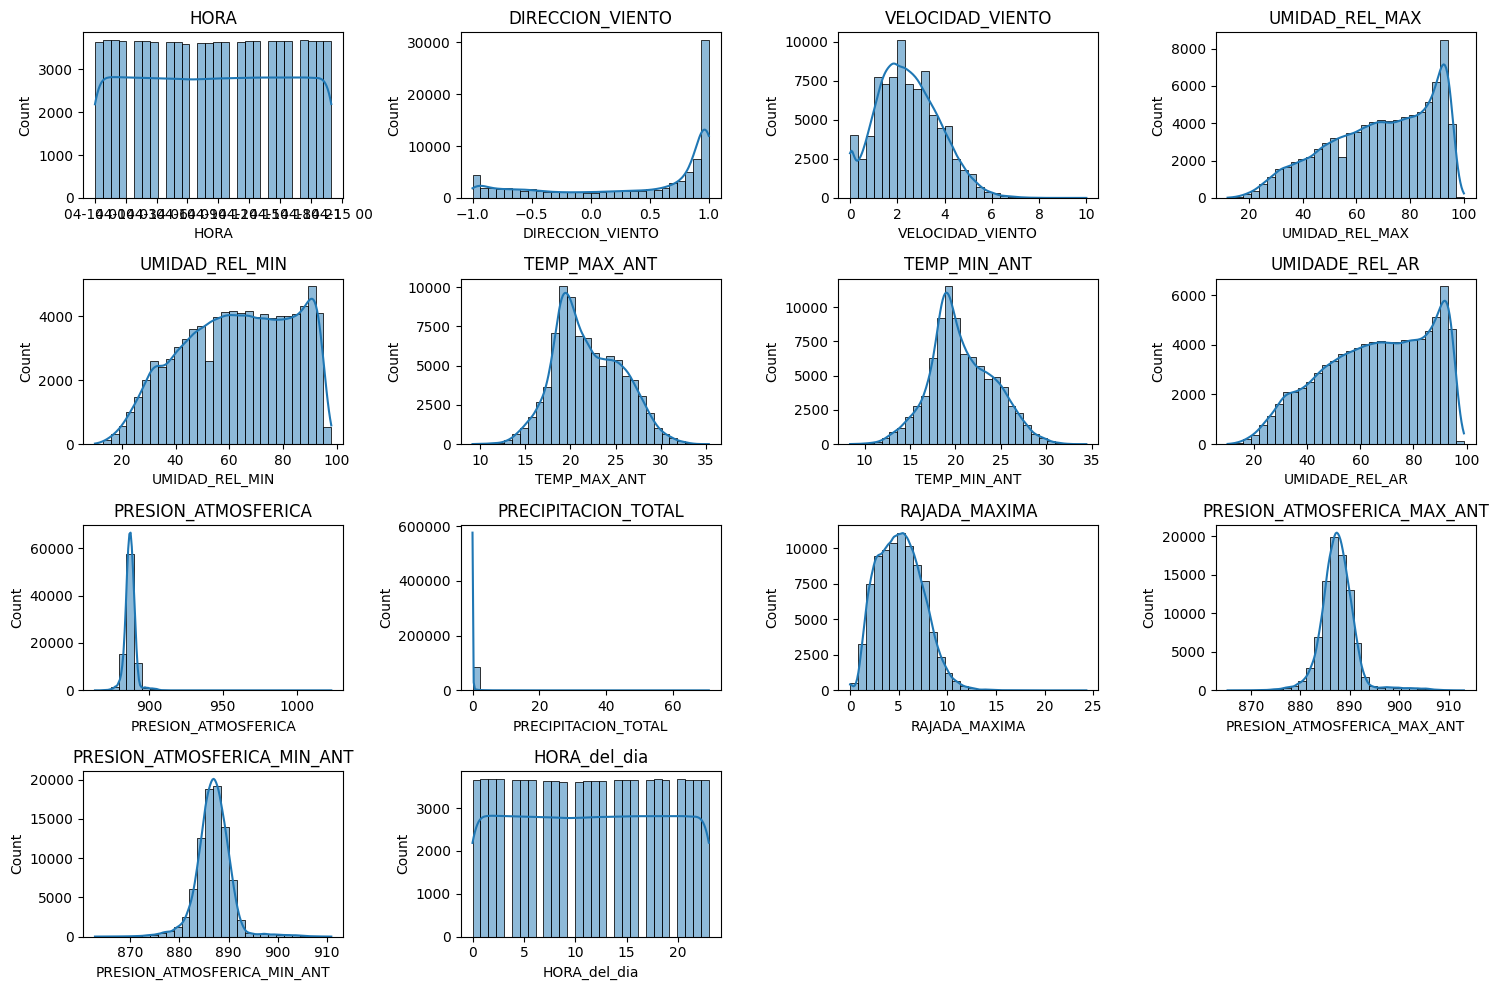

In [28]:
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Iterar sobre cada columna del DataFrame
for i, column in enumerate(df.columns):
    # Crear un subplot para cada variable
    plt.subplot(4, 4, i + 1)

    # Crear el histograma
    sns.histplot(df[column], kde=True, bins=30)

    # Añadir título al subplot
    plt.title(column)

plt.tight_layout()  # Ajustar diseño para evitar superposición de subplots
plt.show()

**Hora y Hora_del_día:** Muestran una distribución uniforme a lo largo del día, indicando que las mediciones se tomaron de forma equitativa en cada hora.

**Dirección del Viento:** Presenta una distribución bimodal, con picos alrededor de -1 y 1, lo que sugiere que el viento tiende a soplar en dos direcciones predominantes.

**Velocidad del Viento:** La distribución es aproximadamente normal con un sesgo ligero hacia velocidades menores, lo cual es típico en datos de viento.

**Humedad Relativa (Max, Min y del Aire):** Muestran distribuciones sesgadas hacia los valores más altos, lo que podría indicar condiciones de humedad prevalentes en la región de estudio.

**Temperatura (Max Anterior, Min Anterior):** Ambas presentan distribuciones que sugieren variaciones diarias normales, con temperaturas máximas más altas como se esperaría.

**Precipitación Total:** Muestra una gran cantidad de días con precipitación nula o baja y algunos eventos de precipitaciones intensas.

**Rajada Máxima:** La distribución de las ráfagas máximas del viento también tiende a ser normal con un sesgo hacia las velocidades más bajas.

**Presión Atmosférica (Actual, Max Ant, Min Ant):** Las presiones atmosféricas muestran distribuciones normales, indicativas de estabilidad en las condiciones de presión a lo largo del tiempo.

##### **Boxplot:**

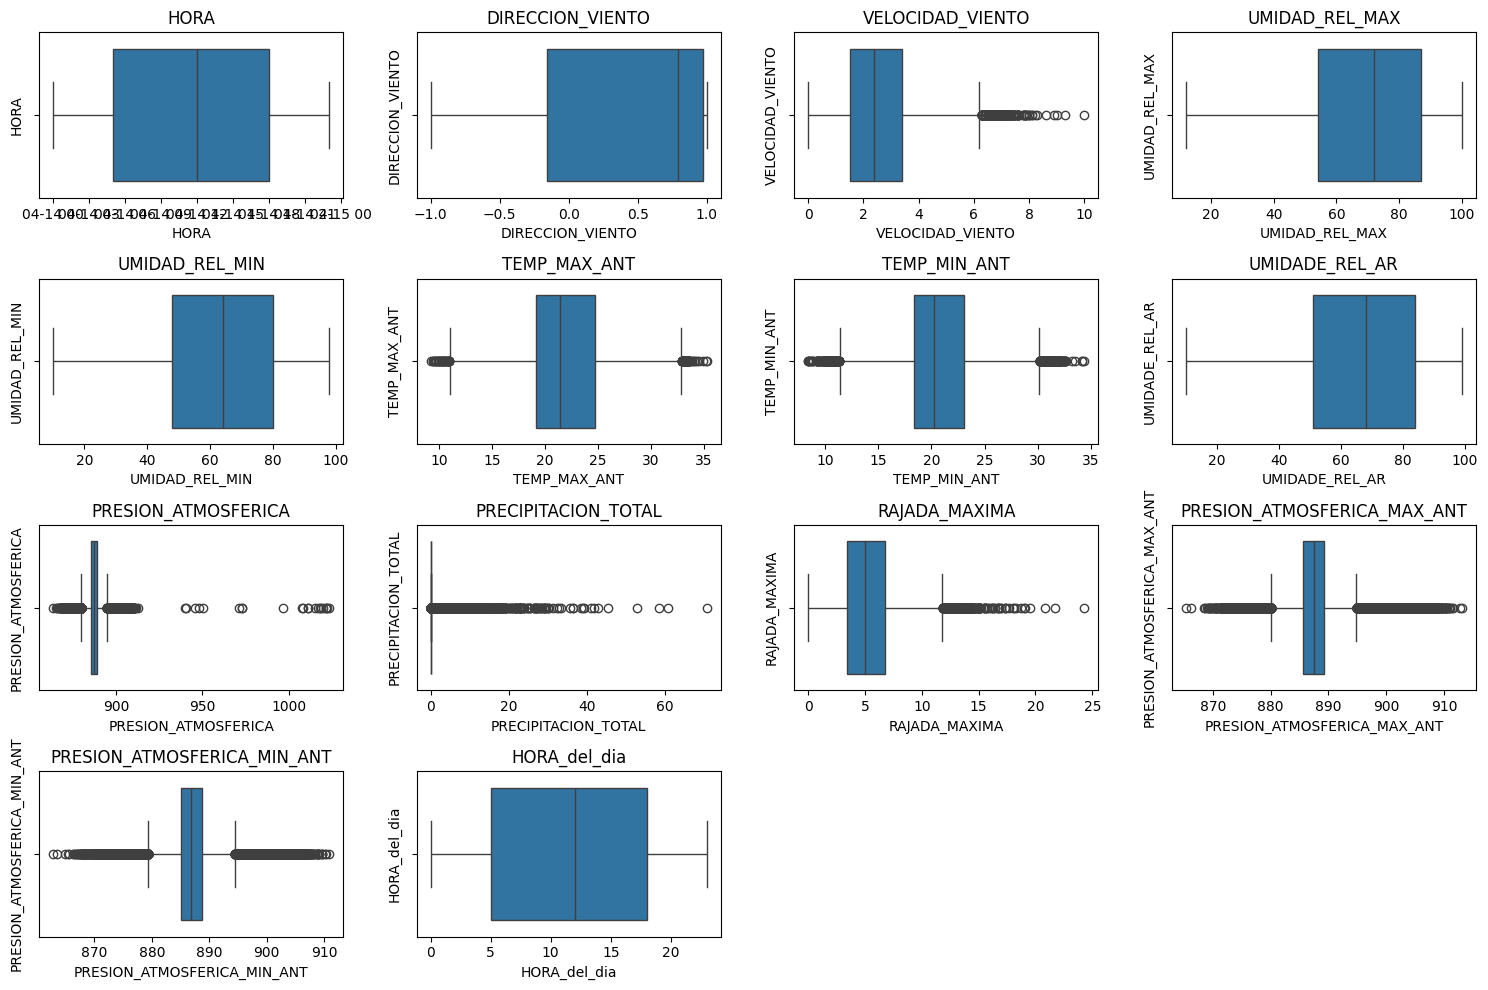

In [29]:
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Iterar sobre cada columna del DataFrame
for i, column in enumerate(df.columns):
    # Crear un subplot para cada variable
    plt.subplot(4, 4, i + 1)

    # Crear el boxplot
    sns.boxplot(x=df[column])

    # Añadir título al subplot
    plt.title(column)

    # Colocar nombre de la variable en el eje y
    plt.ylabel(column)

plt.tight_layout()  # Ajustar diseño para evitar superposición de subplots
plt.show()

- **Hora:** Refleja una distribución uniforme sin valores atípicos, consistente con una cobertura temporal equitativa.
- **Dirección del Viento:** La mayoría de los datos se concentran cerca de los extremos, con pocos valores atípicos, reiterando la presencia de direcciones de viento predominantes.
- **Velocidad del Viento:** Presenta algunos valores atípicos altos, sugiriendo días con vientos excepcionalmente fuertes.
- **Humedad Relativa y Temperatura:** Poseen varios valores atípicos que podrían corresponder a condiciones climáticas anormales o errores de medición.
- **Precipitación Total:** Se identifican valores atípicos extremos, probablemente correspondientes a eventos de lluvia intensa.
- **Presión Atmosférica:** Exhibe pocos valores atípicos, lo que podría ser indicativo de variaciones climáticas o errores en la medición.

##### **ScatterPlot:**

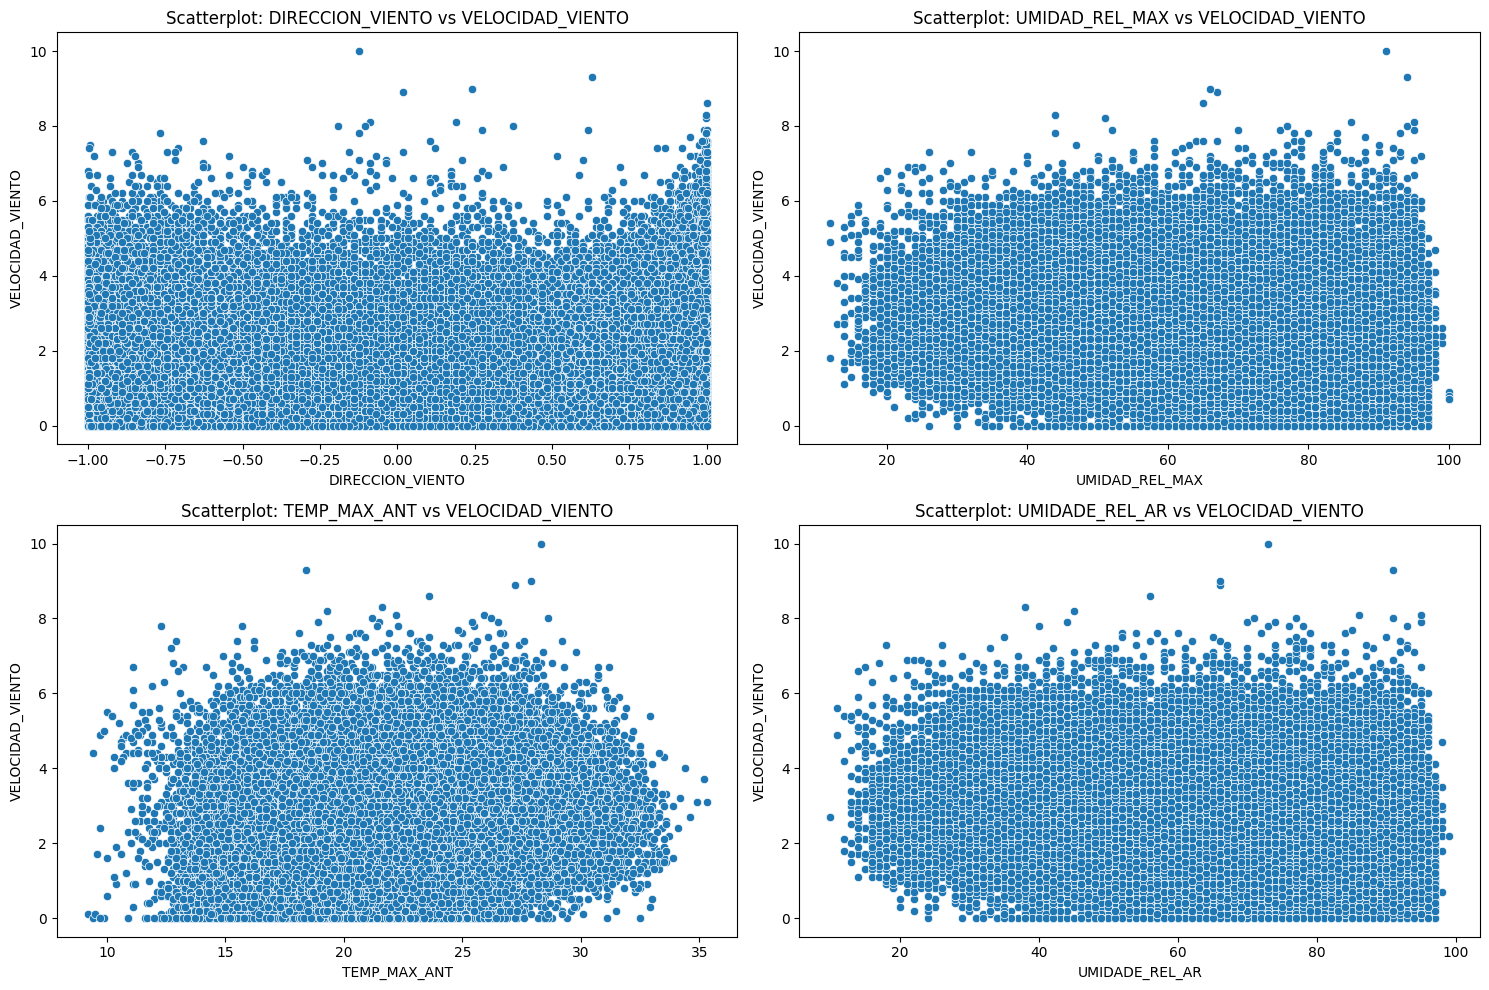

In [38]:
# Seleccionar un mínimo de 4 pares de variables explicativas
pairs = [
    ("DIRECCION_VIENTO", "VELOCIDAD_VIENTO"),
    ("UMIDAD_REL_MAX", "VELOCIDAD_VIENTO"),
    ("TEMP_MAX_ANT", "VELOCIDAD_VIENTO"),
    ("UMIDADE_REL_AR", "VELOCIDAD_VIENTO"),
]

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Iterar sobre cada par de variables
for i, (var1, var2) in enumerate(pairs):
    # Crear un subplot para cada par de variables
    plt.subplot(2, 2, i + 1)

    # Trazar un scatterplot
    sns.scatterplot(x=df[var1], y=df[var2])

    # Añadir título al subplot
    plt.title(f"Scatterplot: {var1} vs {var2}")

plt.tight_layout()  # Ajustar diseño para evitar superposición de subplots
plt.show()

**Dirección del Viento vs. Velocidad del Viento:** No se observa una correlación clara, lo que sugiere que la dirección del viento no determina su velocidad.

**Temperatura Máxima Anterior vs. Velocidad del Viento:** La dispersión no muestra una relación definida, lo que indica que la temperatura no tiene un impacto directo en la velocidad del viento.

**Humedad Relativa (Max y del Aire) vs. Velocidad del Viento:** Ambas graficas no muestran una correlación aparente, sugiriendo que la humedad relativa no influye significativamente en la velocidad del viento.

##### **RegPlot:**

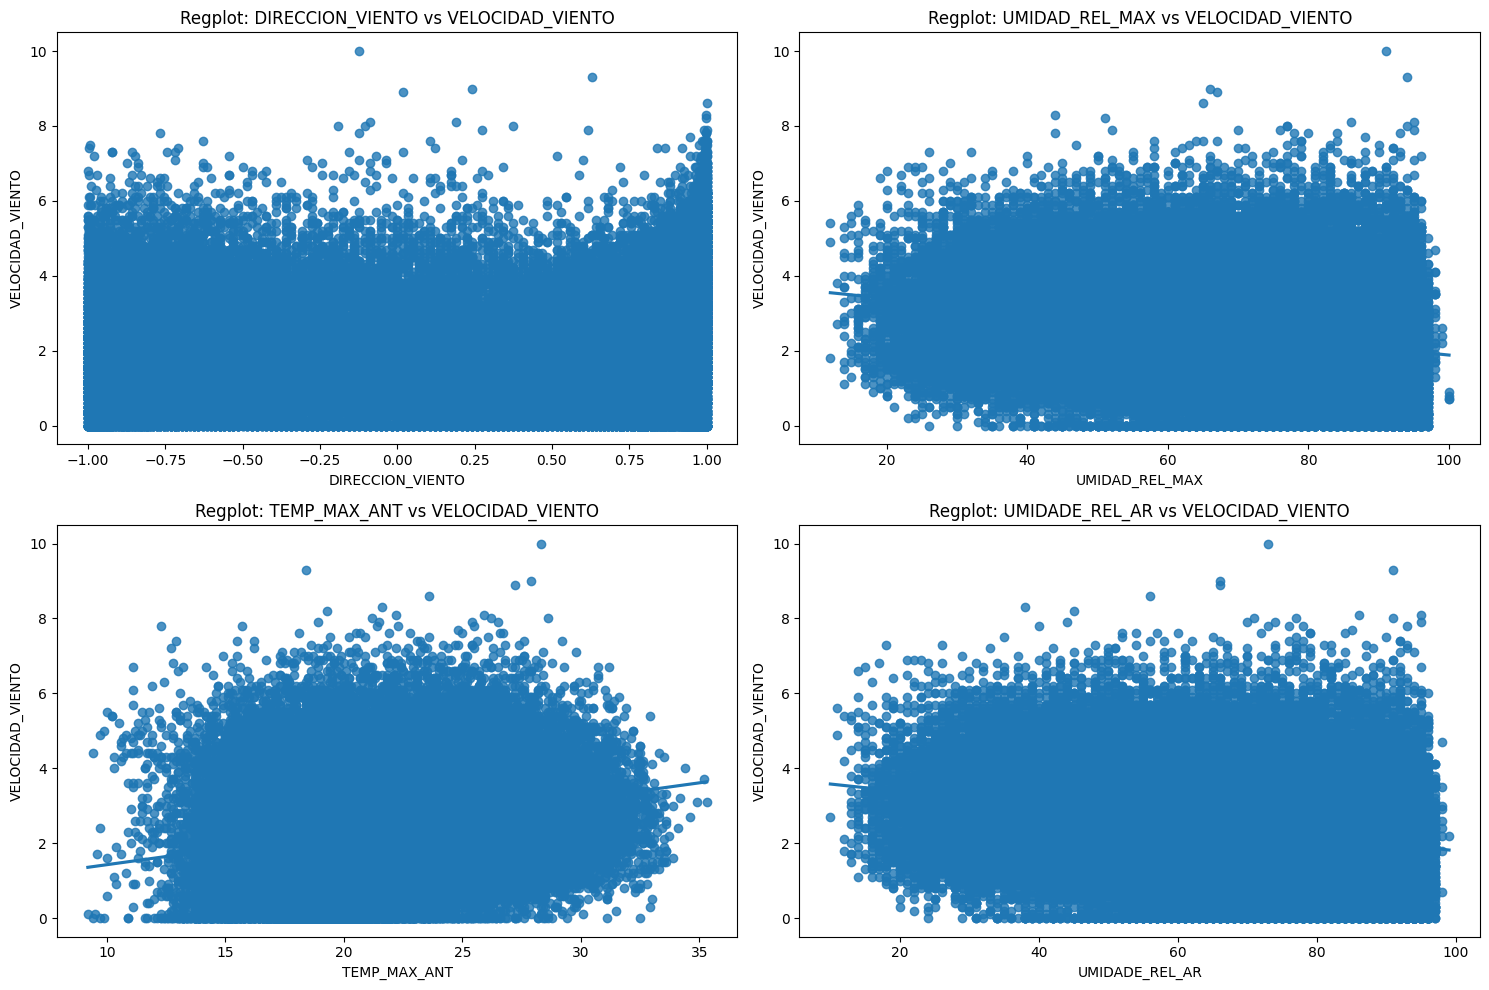

In [37]:
# Configurar el tamaño de la figura para los regplots
plt.figure(figsize=(15, 10))

# Iterar sobre cada par de variables para los regplots
for i, (var1, var2) in enumerate(pairs):
    # Crear un subplot para cada par de variables
    plt.subplot(2, 2, i + 1)

    # Trazar un regplot
    sns.regplot(x=df[var1], y=df[var2], scatter=True)

    # Añadir título al subplot
    plt.title(f"Regplot: {var1} vs {var2}")

plt.tight_layout()  # Ajustar diseño para evitar superposición de subplots
plt.show()

**Dirección del Viento vs. Velocidad del Viento:** La concentración de puntos a lo largo de la parte inferior sugiere que la velocidad del viento tiende a ser baja independientemente de la dirección del viento.

**Temperatura Máxima Anterior vs. Velocidad del Viento:** Similar al scatterplot, no hay una tendencia clara, lo que implica una independencia entre estas dos variables.

**Humedad Relativa (Max y del Aire) vs. Velocidad del Viento:** A pesar de la falta de una relación lineal, hay una concentración de valores en los rangos de humedad más bajos, lo que podría ser de interés para un análisis más profundo.

#### **Correlacion entre variables:**

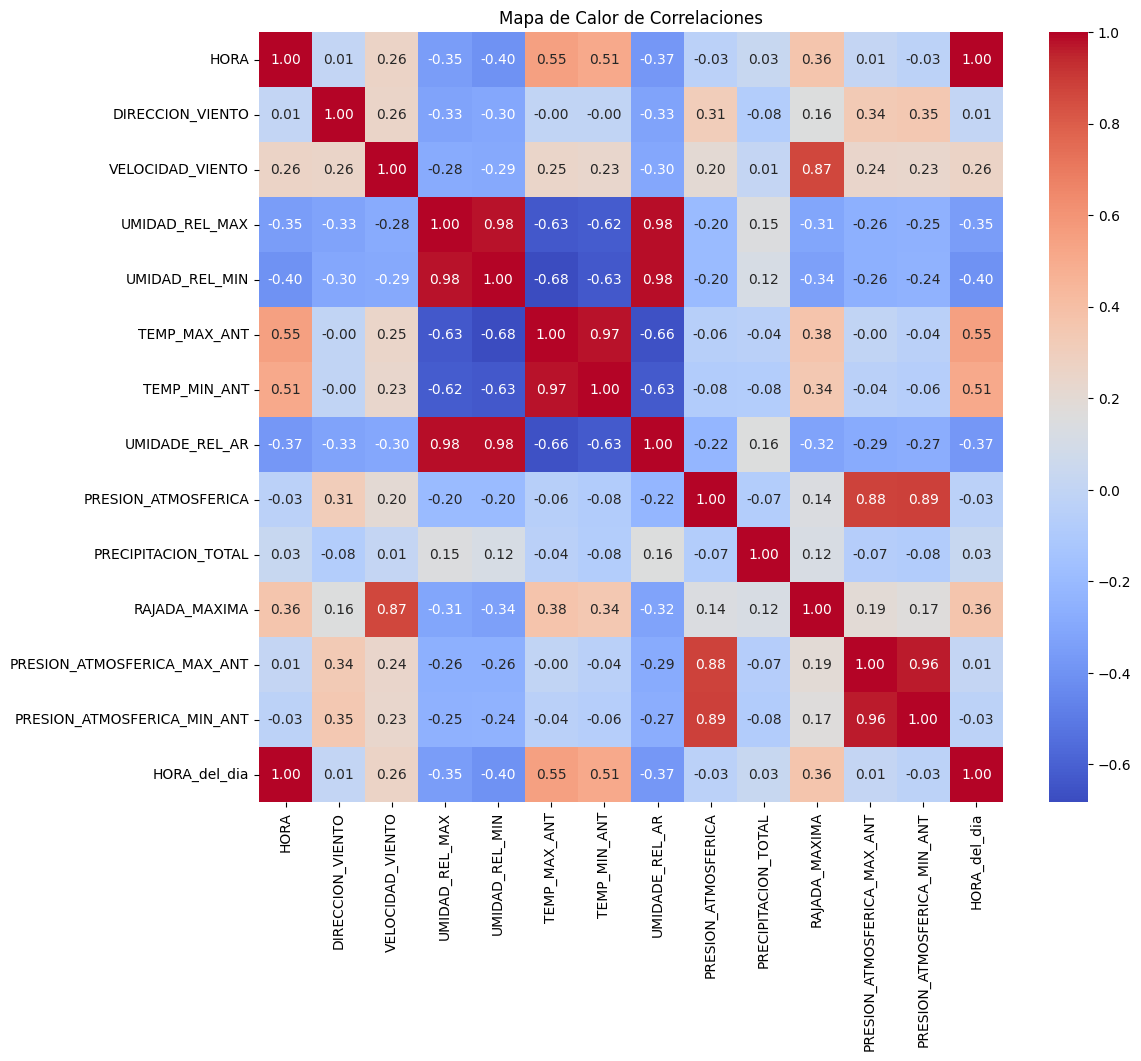

In [30]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Trazar el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Añadir título
plt.title("Mapa de Calor de Correlaciones")

plt.show()

In [32]:
print(corr_matrix)

                                 HORA  DIRECCION_VIENTO  VELOCIDAD_VIENTO  \
HORA                         1.000000          0.005874          0.258108   
DIRECCION_VIENTO             0.005874          1.000000          0.256588   
VELOCIDAD_VIENTO             0.258108          0.256588          1.000000   
UMIDAD_REL_MAX              -0.352719         -0.325512         -0.282787   
UMIDAD_REL_MIN              -0.402061         -0.301443         -0.291752   
TEMP_MAX_ANT                 0.551250         -0.003071          0.247706   
TEMP_MIN_ANT                 0.512878         -0.003228          0.231472   
UMIDADE_REL_AR              -0.374856         -0.325574         -0.301358   
PRESION_ATMOSFERICA         -0.033710          0.311515          0.204031   
PRECIPITACION_TOTAL          0.030936         -0.077363          0.009466   
RAJADA_MAXIMA                0.364312          0.158429          0.868279   
PRESION_ATMOSFERICA_MAX_ANT  0.008508          0.336029          0.242446   

**La hora del día** tiene una correlación positiva moderada con **la temperatura máxima anterior** (0.551250) y **la máxima ráfaga de viento** (0.364312), lo que sugiere que tanto las temperaturas más altas como las ráfagas de viento más fuertes tienden a ocurrir en horas específicas del día.

**La dirección del viento** muestra una correlación positiva moderada con la presión atmosférica y sus valores máximos y mínimos anteriores (alrededor de 0.31-0.35), indicando que ciertas direcciones del viento podrían estar asociadas con valores específicos de presión atmosférica.

**La velocidad del viento** tiene una correlación muy fuerte con **la ráfaga máxima** (0.868279), lo que es esperado, ya que las ráfagas son picos en la velocidad del viento.

**La humedad relativa máxima y mínima** presentan una correlación muy alta entre sí (0.976847), lo que implica que los valores de humedad relativa tienden a cambiar juntos durante el mismo período. Estas también tienen correlaciones negativas fuertes con **la temperatura máxima anterior** (aproximadamente -0.63), lo que podría sugerir que cuando la temperatura alcanza su punto más alto, la humedad relativa tiende a ser más baja.

**La temperatura máxima anterior** y l**a temperatura mínima anterior** también están muy correlacionadas (0.974177), lo que indica que las temperaturas máximas y mínimas del día previo están muy relacionadas, probablemente reflejando la variación diurna normal de temperatura.

**La presión atmosférica** está correlacionada con sus propios valores máximos y mínimos anteriores (alrededor de 0.96), sugiriendo que los cambios en la presión atmosférica son relativamente estables y graduales en este conjunto de datos.

#### **Reduccion de dimensiones:**

In [30]:
# Función para calcular el VIF para el conjunto de datos
def calculate_vif(df):
    # Convertir todas las columnas a tipo numérico si es posible, ignorar errores para mantener columnas no convertibles
    df_numeric = df.apply(pd.to_numeric, errors="ignore")
    # Eliminar filas con cualquier NaN en columnas numéricas (opcional, dependiendo de tu estrategia de manejo de datos)
    df_numeric = df_numeric.dropna()
    # Calcular el VIF para cada columna numérica
    vif_data = pd.DataFrame()
    vif_data["feature"] = df_numeric.columns
    vif_data["VIF"] = [
        variance_inflation_factor(df_numeric.values, i)
        for i in range(df_numeric.shape[1])
    ]
    return vif_data


# Función para eliminar columnas con alto VIF
def remove_high_vif_columns(df, dependent_col, threshold=5):
    features = df.columns.tolist()
    features.remove(dependent_col)

    while True:
        # Calcular VIF para el conjunto de datos excluyendo la variable dependiente
        vif_data = calculate_vif(df[features])
        max_vif = vif_data["VIF"].max()

        if max_vif < threshold:
            break

        # Eliminar la columna con el VIF más alto
        max_vif_feature = vif_data.loc[vif_data["VIF"] == max_vif, "feature"].iloc[0]
        features.remove(max_vif_feature)
        print(f"Columna eliminada: {max_vif_feature} debido a un alto VIF de {max_vif}")

    return df[features + [dependent_col]]

In [31]:
df_reduced = remove_high_vif_columns(df, 'VEL_VIENTO')

C:\Users\Jesus David\AppData\Local\Temp\ipykernel_15272\2921786886.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_numeric = df.apply(pd.to_numeric, errors='ignore')


Columna eliminada: HORA debido a un alto VIF de 83894.32615193808


C:\Users\Jesus David\AppData\Local\Temp\ipykernel_15272\2921786886.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_numeric = df.apply(pd.to_numeric, errors='ignore')


Columna eliminada: PRES_ATM_MIN_ANT debido a un alto VIF de 969391.3696941748


C:\Users\Jesus David\AppData\Local\Temp\ipykernel_15272\2921786886.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_numeric = df.apply(pd.to_numeric, errors='ignore')


Columna eliminada: PRES_ATM_MAX_ANT debido a un alto VIF de 222460.55504251865


C:\Users\Jesus David\AppData\Local\Temp\ipykernel_15272\2921786886.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_numeric = df.apply(pd.to_numeric, errors='ignore')


Columna eliminada: TEMP_MAX_ANT debido a un alto VIF de 2419.0657118466975


C:\Users\Jesus David\AppData\Local\Temp\ipykernel_15272\2921786886.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_numeric = df.apply(pd.to_numeric, errors='ignore')


Columna eliminada: UMID_REL_AR debido a un alto VIF de 589.2259835549189
Columna eliminada: UMID_REL_MAX debido a un alto VIF de 322.4391410571869


C:\Users\Jesus David\AppData\Local\Temp\ipykernel_15272\2921786886.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_numeric = df.apply(pd.to_numeric, errors='ignore')
C:\Users\Jesus David\AppData\Local\Temp\ipykernel_15272\2921786886.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_numeric = df.apply(pd.to_numeric, errors='ignore')


Columna eliminada: PRES_ATM debido a un alto VIF de 132.3958705481665
Columna eliminada: TEMP_MIN_ANT debido a un alto VIF de 17.6771409674466
Columna eliminada: RAJADA_MAX debido a un alto VIF de 5.9021851811011015


C:\Users\Jesus David\AppData\Local\Temp\ipykernel_15272\2921786886.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_numeric = df.apply(pd.to_numeric, errors='ignore')
C:\Users\Jesus David\AppData\Local\Temp\ipykernel_15272\2921786886.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_numeric = df.apply(pd.to_numeric, errors='ignore')
C:\Users\Jesus David\AppData\Local\Temp\ipykernel_15272\2921786886.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_numeric = df.apply(pd.to_numeric, errors='ignore')


Aquí se utilizó el Factor de Inflación de la Varianza (VIF) para identificar y eliminar las variables con alta multicolinealidad.

**La columna "HORA"** fue eliminada debido a su extremadamente alto VIF de aproximadamente 83,894.33, lo que indica que esta variable estaba altamente correlacionada con otras variables en el conjunto de datos, posiblemente debido a que captura información que se solapa con la hora del día y otros ciclos temporales.

**Las columnas "PRES_ATM_MIN_ANT" y "PRES_ATM_MAX_ANT"** mostraron VIF extremadamente altos (aproximadamente 969,391.37 y 222,460.55 respectivamente), lo que sugiere que estas variables de presión atmosférica máxima y mínima anterior estaban también fuertemente correlacionadas con las otras características meteorológicas.

**La "TEMP_MAX_ANT"** (temperatura máxima anterior) y **la "UMID_REL_AR"** (humedad relativa del aire) fueron eliminadas por tener VIF altos (aproximadamente 2,419.07 y 589.23 respectivamente), lo que sugiere que estas variables compartían información redundante con otros predictores.

La eliminación de la columna **"UMID_REL_MAX"** (humedad relativa máxima) con un VIF de 322.44, **"PRES_ATM"** (presión atmosférica) con un VIF de 132.39, **"TEMP_MIN_ANT"** (temperatura mínima anterior) con un VIF de 17.68 y **"RAJADA_MAX"** (ráfaga máxima) con un VIF de 5.90 refleja el mismo esfuerzo para reducir la multicolinealidad.

Después de este proceso, se conservaron las columnas **"DIR_VIENTO"**, **"UMID_REL_MIN"**, **"PRECIP_TOTAL"**, **"HORA_del_dia"** y **"VEL_VIENTO"**, ya que estas variables no presentaron niveles problemáticos de multicolinealidad.

In [32]:
df_reduced.head()

,DIR_VIENTO,UMID_REL_MIN,PRECIP_TOTAL,HORA_del_dia,VEL_VIENTO
0,0.809017,60.0,0.0,12,1.8
1,0.965926,55.0,0.0,13,2.7
2,0.891007,50.0,0.0,14,2.0
3,0.848048,44.0,0.0,15,2.5
4,0.224951,43.0,0.0,16,2.4


#### **Comparacion de modelos:**

##### **Preparacion de los datos:**

In [39]:
X = df_reduced.drop("VEL_VIENTO", axis=1)
y = df_reduced["VEL_VIENTO"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### **Entrenamiento:**

In [40]:
# Inicializar los modelos
lr = LinearRegression()
ridge = Ridge(
    alpha=1.0
)  # El alpha es un parámetro de regularización que puede ser ajustado
lasso = Lasso(alpha=0.1)  # El alpha aquí también es ajustable

# Entrenar los modelos
lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

##### **Evaluacion de modelos:** 

In [42]:
# Función para calcular métricas
def calculate_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2


# Calcular métricas
metrics_lr = calculate_metrics(lr, X_test_scaled, y_test)
metrics_ridge = calculate_metrics(ridge, X_test_scaled, y_test)
metrics_lasso = calculate_metrics(lasso, X_test_scaled, y_test)

# Organizacion de las métricas en un DataFrame
results = pd.DataFrame(
    {"Linear Regression": metrics_lr, "Ridge": metrics_ridge, "Lasso": metrics_lasso},
    index=["RMSE", "MAE", "R^2"],
)

results

,Linear Regression,Ridge,Lasso
RMSE,1.209956,1.209955,1.218547
MAE,0.965040,0.965040,0.973746
R^2,0.144963,0.144963,0.132777


**Regresión Lineal:**
Tiene un **RMSE** de 1.209956 y un **MAE** de 0.965040, lo que indica que, en promedio, las predicciones del modelo desvían alrededor de 1.21 unidades del valor real en términos de RMSE y alrededor de 0.965 unidades en términos de MAE.
Un **R^2** de 0.144963 sugiere que aproximadamente el 14.5% de la variabilidad de la variable dependiente es explicada por el modelo.

**Ridge:**
Posee prácticamente el mismo **RMSE** y **MAE** que la regresión lineal, lo cual es esperable ya que Ridge es una regresión lineal con regularización L2 que castiga los coeficientes grandes, y puede no hacer una gran diferencia si la multicolinealidad no es alta o si el modelo lineal no está sobreajustado.
El R^2 también es idéntico al de la regresión lineal, reforzando la idea de que, para este conjunto de datos, la penalización adicional de Ridge no altera significativamente el ajuste del modelo.

**Lasso:**
Presenta un **RMSE** ligeramente más alto de 1.218547 y un **MAE** de 0.973746, lo que significa que las predicciones de este modelo tienden a estar un poco más alejadas de los valores reales en comparación con los otros dos modelos.
El **R^2** de 0.132777 es más bajo que los otros modelos, lo que indica que Lasso explica aproximadamente el 13.3% de la variabilidad de la variable dependiente, un poco menos que la regresión lineal y Ridge. Dado que Lasso realiza regularización L1, que puede reducir algunos coeficientes a cero, esto podría sugerir que algunos predictores han sido completamente excluidos del modelo, lo que podría llevar a una menor capacidad explicativa.

**Interpretación General:**
**Los tres modelos tienen un rendimiento similar en cuanto a RMSE y MAE, con diferencias mínimas entre ellos.** Esto podría indicar que el conjunto de datos no tiene problemas graves de multicolinealidad, o que los predictores no tienen coeficientes lo suficientemente grandes como para que la regularización haga una diferencia sustancial. La ligera disminución en el rendimiento de Lasso en términos de R^2 podría deberse a la exclusión de algunos predictores que podrían tener algún grado de relevancia en el modelo.

 *La elección entre estos modelos podría depender de si se prefiere la simplicidad del modelo (Lasso podría proporcionar un modelo más sencillo con menos predictores) o si se busca capturar toda la variabilidad posible (en cuyo caso, la regresión lineal o Ridge serían preferibles).*

### **Fraud Detection**

#### **Importacion de datos:**

In [9]:
# Cargar los conjuntos de datos desde archivos CSV
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')

# Fusionar los conjuntos de datos en base a la columna 'TransactionID'
merged_data = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

#### **Estrutura de los datos:**

In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


##### **Tamaño:**

In [11]:
merged_data.shape

(590540, 434)

##### **Conteo de nulos:**

In [12]:
# Conteo de datos faltantes por columna
datos_faltantes2 = merged_data.isnull().sum()

# Calcular el porcentaje de datos faltantes por columna
porcentaje_faltantes2 = (datos_faltantes2 / len(merged_data)) * 100

# Crear un DataFrame para mostrar los resultados
df_faltantes2 = pd.DataFrame({'Datos faltantes': datos_faltantes2, 'Porcentaje faltantes': porcentaje_faltantes})

# Mostrar el DataFrame con los resultados
print(df_faltantes2)

         Datos faltantes  Porcentaje faltantes
C1                   0.0                   NaN
C10                  0.0                   NaN
C11                  0.0                   NaN
C12                  0.0                   NaN
C13                  0.0                   NaN
...                  ...                   ...
id_35           449555.0                   NaN
id_36           449555.0                   NaN
id_37           449555.0                   NaN
id_38           449555.0                   NaN
isFraud              0.0                   NaN

[447 rows x 2 columns]


#### **imputacion de datos faltantes usando la mediana:**

In [ ]:
imp = SimpleImputer(strategy="mean")
print(imp.fit_transform(merged_data))

#### **Revision de nulos post imputacion:**

In [ ]:
# Contar los valores nulos en cada columna
missing_values = merged_data_imputed.isnull().sum()

# Calcular el porcentaje de valores nulos en cada columna
percentage_missing = (missing_values / len(merged_data_imputed)) * 100

# Crear un DataFrame con los resultados
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})

# Mostrar el resumen de datos faltantes
print(missing_data_summary)